In [1]:
import tensorflow as tf

- learning rate(학습률) : 딥러닝에서 learning rate(학습률)란 모델이 가중치(weight)를 업데이트할 때, 얼마나 큰 보폭으로 업데이트를 진행할지를 결정하는 하이퍼파라미터이다.

- training epoch : 주어진 데이터셋 전체를 한 번 처리하면 1epoch이다. 한 에폭(epoch) 동안 모델은 데이터셋의 모든 샘플을 한 번씩 처리하며, 이를 통해 모델의 가중치(weight)를 조정하고 손실(loss)을 최소화한다. 데이터셋을 몇 번 반복할 것인지 설정해야 한다.

In [2]:
learning_rate = 0.0005
training_epoch = 10000

In [3]:
dl_lr = tf.keras.Sequential()

## 딥러닝 모델의 layer 설정

- 입력 변수의 구조 알려주기 : tf.keras.Input(shape=()) >> csv파일을 예로 들면 '열'의 개수를 알려주면 됨.

- layer 설정 : tf.keras.layers.Dense(노드의 개수, activation= 활성화 함수 지정)

In [4]:
dl_lr.add(tf.keras.Input(shape=(1,))) # 입력변수 구조 설정 input할 때, 대문자 I 임
dl_lr.add(tf.keras.layers.Dense(16,activation='relu'))
dl_lr.add(tf.keras.layers.Dense(32,activation='relu'))
dl_lr.add(tf.keras.layers.Dense(1)) # 마지막엔 종속 변수 y값이 그대로 나와야 
#                                 하기 때문에 activation 미 설정

## 모델의 optimizer와 loss(비용함수)를 설정

- optimizer : 비용함수를 이용해 비용을 최소화하는 방향으로 모델의 가중치를 업데이트하는 최적화 함수이다. 주로 Adam을 사용

- loss : 비용함수이다. 대표적으로 MeanSquaredError(최소제곱법)를 사용한다.

In [5]:
dl_lr.compile(optimizer=tf.keras.optimizers.Adam(),
             loss=tf.keras.losses.MeanSquaredError())

In [6]:
dl_lr.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                32        
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 609
Trainable params: 609
Non-trainable params: 0
_________________________________________________________________


# 모델 학습시키기

### 데이터 불러오기

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [8]:
data = pd.read_csv("./data/quadratic_sample_tensorflow.csv",skiprows=1,header=None,names=['x1','x2','y'])

In [9]:
data

,x1,x2,y
0,0.1,0.01,94.818981
1,0.2,0.04,94.633440
2,0.3,0.09,98.196254
3,0.4,0.16,92.815593
4,0.5,0.25,86.194229
...,...,...,...
194,19.5,380.25,91.713508
195,19.6,384.16,87.253908
196,19.7,388.09,98.795449
197,19.8,392.04,93.435914


### 학습데이터, 테스트데이터 분리

In [10]:
# X = data[['x1','x2']]
X = data[['x1']]
Y = data['y']
xTrain,xTest,yTrain,yTest = train_test_split(X,Y,test_size=0.2)

In [11]:
xTrain

,x1
72,7.3
103,10.4
155,15.6
148,14.9
181,18.2
...,...
176,17.7
61,6.2
74,7.5
63,6.4


### fit()함수로 모델을 학습시킨다.

- callbacks : 학습 도중에 호출할 함수를 설정한다. 
    - EarlyStopping() : validation_loss(검증손실)이 더이상 개선되지 않으면 학습을 중단시키는 함수이다. 즉 학습이 더 이상 의미 없어지면 epochs에 도달하기 전에 중지시킨다.
        - monitor : 모니터링할 값을 지정한다. > validation_loss를 줄여서 val_loss
        - patience : 지연 횟수를 의미. > 500 : 일단 학습을 500번 진행한 후부터 EarlyStopping()을 호출한다

- validation_split : 검증용 데이터셋을 0~1 사이의 값으로 설정한다. 

In [12]:
%%time
dl_lr.fit(x=xTrain,y=yTrain,epochs=training_epoch,
         callbacks=tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=500),
         validation_split=0.2)

Epoch 1/10000
4/4 [==============================] - 0s 40ms/step - loss: 1871.5419 - val_loss: 1963.6133
Epoch 2/10000
4/4 [==============================] - 0s 6ms/step - loss: 1837.3831 - val_loss: 1919.5090
Epoch 3/10000
4/4 [==============================] - 0s 6ms/step - loss: 1802.5977 - val_loss: 1880.3103
Epoch 4/10000
4/4 [==============================] - 0s 9ms/step - loss: 1773.0116 - val_loss: 1842.5702
Epoch 5/10000
4/4 [==============================] - 0s 6ms/step - loss: 1744.6472 - val_loss: 1809.4507
Epoch 6/10000
4/4 [==============================] - 0s 9ms/step - loss: 1718.7094 - val_loss: 1777.4658
Epoch 7/10000
4/4 [==============================] - 0s 9ms/step - loss: 1695.7975 - val_loss: 1745.9600
Epoch 8/10000
4/4 [==============================] - 0s 6ms/step - loss: 1671.6566 - val_loss: 1715.5476
Epoch 9/10000
4/4 [==============================] - 0s 8ms/step - loss: 1648.7473 - val_loss: 1685.9009
Epoch 10/10000
4/4 [==============================] - 

4/4 [==============================] - 0s 9ms/step - loss: 1051.3385 - val_loss: 804.7891
Epoch 79/10000
4/4 [==============================] - 0s 9ms/step - loss: 1051.0939 - val_loss: 804.4157
Epoch 80/10000
4/4 [==============================] - 0s 9ms/step - loss: 1050.7770 - val_loss: 804.0086
Epoch 81/10000
4/4 [==============================] - 0s 9ms/step - loss: 1050.5352 - val_loss: 804.0741
Epoch 82/10000
4/4 [==============================] - 0s 8ms/step - loss: 1050.2811 - val_loss: 803.3641
Epoch 83/10000
4/4 [==============================] - 0s 11ms/step - loss: 1049.9009 - val_loss: 803.3680
Epoch 84/10000
4/4 [==============================] - 0s 9ms/step - loss: 1049.7635 - val_loss: 802.7311
Epoch 85/10000
4/4 [==============================] - 0s 9ms/step - loss: 1049.3181 - val_loss: 802.4354
Epoch 86/10000
4/4 [==============================] - 0s 9ms/step - loss: 1049.1359 - val_loss: 802.8470
Epoch 87/10000
4/4 [==============================] - 0s 12ms/step - 

4/4 [==============================] - 0s 12ms/step - loss: 1028.2495 - val_loss: 787.1932
Epoch 156/10000
4/4 [==============================] - 0s 12ms/step - loss: 1027.6821 - val_loss: 787.3080
Epoch 157/10000
4/4 [==============================] - 0s 9ms/step - loss: 1027.4830 - val_loss: 786.7681
Epoch 158/10000
4/4 [==============================] - 0s 10ms/step - loss: 1027.1018 - val_loss: 786.8783
Epoch 159/10000
4/4 [==============================] - 0s 9ms/step - loss: 1026.7714 - val_loss: 786.7133
Epoch 160/10000
4/4 [==============================] - 0s 11ms/step - loss: 1026.5273 - val_loss: 786.1291
Epoch 161/10000
4/4 [==============================] - 0s 10ms/step - loss: 1026.0526 - val_loss: 785.9059
Epoch 162/10000
4/4 [==============================] - 0s 10ms/step - loss: 1025.7302 - val_loss: 785.5191
Epoch 163/10000
4/4 [==============================] - 0s 9ms/step - loss: 1025.5198 - val_loss: 785.7090
Epoch 164/10000
4/4 [==============================] - 0

4/4 [==============================] - 0s 9ms/step - loss: 1001.4675 - val_loss: 769.8331
Epoch 233/10000
4/4 [==============================] - 0s 9ms/step - loss: 1001.1401 - val_loss: 769.3044
Epoch 234/10000
4/4 [==============================] - 0s 12ms/step - loss: 1000.7216 - val_loss: 768.9576
Epoch 235/10000
4/4 [==============================] - 0s 9ms/step - loss: 1000.5250 - val_loss: 768.2344
Epoch 236/10000
4/4 [==============================] - 0s 12ms/step - loss: 1000.0942 - val_loss: 768.1161
Epoch 237/10000
4/4 [==============================] - 0s 10ms/step - loss: 999.6261 - val_loss: 768.0939
Epoch 238/10000
4/4 [==============================] - 0s 10ms/step - loss: 999.1656 - val_loss: 767.9235
Epoch 239/10000
4/4 [==============================] - 0s 9ms/step - loss: 999.0066 - val_loss: 766.9160
Epoch 240/10000
4/4 [==============================] - 0s 10ms/step - loss: 998.5191 - val_loss: 766.2753
Epoch 241/10000
4/4 [==============================] - 0s 13m

Epoch 310/10000
4/4 [==============================] - 0s 9ms/step - loss: 966.5200 - val_loss: 746.8549
Epoch 311/10000
4/4 [==============================] - 0s 9ms/step - loss: 966.1768 - val_loss: 747.2153
Epoch 312/10000
4/4 [==============================] - 0s 8ms/step - loss: 965.4924 - val_loss: 746.6852
Epoch 313/10000
4/4 [==============================] - 0s 11ms/step - loss: 964.9117 - val_loss: 746.1140
Epoch 314/10000
4/4 [==============================] - 0s 13ms/step - loss: 964.3771 - val_loss: 745.9049
Epoch 315/10000
4/4 [==============================] - 0s 12ms/step - loss: 963.9813 - val_loss: 746.2974
Epoch 316/10000
4/4 [==============================] - 0s 11ms/step - loss: 963.7115 - val_loss: 744.8915
Epoch 317/10000
4/4 [==============================] - 0s 7ms/step - loss: 962.6974 - val_loss: 744.4835
Epoch 318/10000
4/4 [==============================] - 0s 12ms/step - loss: 962.1421 - val_loss: 744.5143
Epoch 319/10000
4/4 [=============================

4/4 [==============================] - 0s 9ms/step - loss: 913.8692 - val_loss: 721.2922
Epoch 388/10000
4/4 [==============================] - 0s 9ms/step - loss: 913.3300 - val_loss: 719.7812
Epoch 389/10000
4/4 [==============================] - 0s 13ms/step - loss: 912.0488 - val_loss: 719.0734
Epoch 390/10000
4/4 [==============================] - 0s 9ms/step - loss: 911.2041 - val_loss: 719.5526
Epoch 391/10000
4/4 [==============================] - 0s 9ms/step - loss: 910.6573 - val_loss: 720.1909
Epoch 392/10000
4/4 [==============================] - 0s 13ms/step - loss: 909.4095 - val_loss: 719.6140
Epoch 393/10000
4/4 [==============================] - 0s 9ms/step - loss: 908.3959 - val_loss: 719.4805
Epoch 394/10000
4/4 [==============================] - 0s 13ms/step - loss: 907.5381 - val_loss: 718.9572
Epoch 395/10000
4/4 [==============================] - 0s 9ms/step - loss: 906.7072 - val_loss: 718.5447
Epoch 396/10000
4/4 [==============================] - 0s 9ms/step -

Epoch 465/10000
4/4 [==============================] - 0s 9ms/step - loss: 799.4860 - val_loss: 664.0155
Epoch 466/10000
4/4 [==============================] - 0s 11ms/step - loss: 797.7395 - val_loss: 664.1528
Epoch 467/10000
4/4 [==============================] - 0s 12ms/step - loss: 796.0140 - val_loss: 663.6686
Epoch 468/10000
4/4 [==============================] - 0s 12ms/step - loss: 794.5685 - val_loss: 662.1606
Epoch 469/10000
4/4 [==============================] - 0s 9ms/step - loss: 792.7256 - val_loss: 661.5656
Epoch 470/10000
4/4 [==============================] - 0s 8ms/step - loss: 791.4679 - val_loss: 661.5654
Epoch 471/10000
4/4 [==============================] - 0s 9ms/step - loss: 789.5052 - val_loss: 661.2950
Epoch 472/10000
4/4 [==============================] - 0s 12ms/step - loss: 788.1451 - val_loss: 660.5869
Epoch 473/10000
4/4 [==============================] - 0s 12ms/step - loss: 786.0554 - val_loss: 659.7495
Epoch 474/10000
4/4 [=============================

4/4 [==============================] - 0s 9ms/step - loss: 594.6091 - val_loss: 557.7719
Epoch 543/10000
4/4 [==============================] - 0s 12ms/step - loss: 592.7286 - val_loss: 555.5307
Epoch 544/10000
4/4 [==============================] - 0s 9ms/step - loss: 590.2007 - val_loss: 554.7332
Epoch 545/10000
4/4 [==============================] - 0s 10ms/step - loss: 588.5501 - val_loss: 554.1547
Epoch 546/10000
4/4 [==============================] - 0s 9ms/step - loss: 586.0989 - val_loss: 552.7766
Epoch 547/10000
4/4 [==============================] - 0s 9ms/step - loss: 584.6146 - val_loss: 550.9042
Epoch 548/10000
4/4 [==============================] - 0s 9ms/step - loss: 582.3084 - val_loss: 551.0842
Epoch 549/10000
4/4 [==============================] - 0s 13ms/step - loss: 580.5367 - val_loss: 549.5859
Epoch 550/10000
4/4 [==============================] - 0s 12ms/step - loss: 578.2149 - val_loss: 548.6828
Epoch 551/10000
4/4 [==============================] - 0s 11ms/step

Epoch 620/10000
4/4 [==============================] - 0s 10ms/step - loss: 450.7590 - val_loss: 465.8881
Epoch 621/10000
4/4 [==============================] - 0s 10ms/step - loss: 449.0412 - val_loss: 464.9650
Epoch 622/10000
4/4 [==============================] - 0s 10ms/step - loss: 447.5547 - val_loss: 463.9219
Epoch 623/10000
4/4 [==============================] - 0s 13ms/step - loss: 446.2326 - val_loss: 461.4213
Epoch 624/10000
4/4 [==============================] - 0s 9ms/step - loss: 444.8840 - val_loss: 459.7428
Epoch 625/10000
4/4 [==============================] - 0s 9ms/step - loss: 443.3183 - val_loss: 458.2020
Epoch 626/10000
4/4 [==============================] - 0s 9ms/step - loss: 442.3078 - val_loss: 458.0868
Epoch 627/10000
4/4 [==============================] - 0s 11ms/step - loss: 440.6612 - val_loss: 456.5015
Epoch 628/10000
4/4 [==============================] - 0s 9ms/step - loss: 439.2986 - val_loss: 455.7263
Epoch 629/10000
4/4 [=============================

Epoch 698/10000
4/4 [==============================] - 0s 9ms/step - loss: 365.3172 - val_loss: 394.2048
Epoch 699/10000
4/4 [==============================] - 0s 9ms/step - loss: 364.8911 - val_loss: 392.3777
Epoch 700/10000
4/4 [==============================] - 0s 12ms/step - loss: 363.8628 - val_loss: 392.7733
Epoch 701/10000
4/4 [==============================] - 0s 9ms/step - loss: 362.9193 - val_loss: 392.4899
Epoch 702/10000
4/4 [==============================] - 0s 8ms/step - loss: 362.1832 - val_loss: 392.4739
Epoch 703/10000
4/4 [==============================] - 0s 9ms/step - loss: 361.2963 - val_loss: 391.8114
Epoch 704/10000
4/4 [==============================] - 0s 9ms/step - loss: 360.5871 - val_loss: 389.2538
Epoch 705/10000
4/4 [==============================] - 0s 9ms/step - loss: 359.3866 - val_loss: 388.1747
Epoch 706/10000
4/4 [==============================] - 0s 9ms/step - loss: 358.5584 - val_loss: 386.9414
Epoch 707/10000
4/4 [==============================] -

4/4 [==============================] - 0s 9ms/step - loss: 297.0642 - val_loss: 320.3296
Epoch 776/10000
4/4 [==============================] - 0s 9ms/step - loss: 295.9878 - val_loss: 318.0623
Epoch 777/10000
4/4 [==============================] - 0s 11ms/step - loss: 295.4039 - val_loss: 316.2960
Epoch 778/10000
4/4 [==============================] - 0s 12ms/step - loss: 294.3863 - val_loss: 316.9475
Epoch 779/10000
4/4 [==============================] - 0s 10ms/step - loss: 293.2971 - val_loss: 315.6919
Epoch 780/10000
4/4 [==============================] - 0s 12ms/step - loss: 292.3570 - val_loss: 314.6598
Epoch 781/10000
4/4 [==============================] - 0s 9ms/step - loss: 291.9399 - val_loss: 314.9754
Epoch 782/10000
4/4 [==============================] - 0s 11ms/step - loss: 290.2300 - val_loss: 312.8332
Epoch 783/10000
4/4 [==============================] - 0s 8ms/step - loss: 289.2776 - val_loss: 311.2369
Epoch 784/10000
4/4 [==============================] - 0s 12ms/ste

Epoch 853/10000
4/4 [==============================] - 0s 9ms/step - loss: 218.9904 - val_loss: 232.8577
Epoch 854/10000
4/4 [==============================] - 0s 12ms/step - loss: 217.8235 - val_loss: 230.5277
Epoch 855/10000
4/4 [==============================] - 0s 12ms/step - loss: 216.6911 - val_loss: 228.9696
Epoch 856/10000
4/4 [==============================] - 0s 11ms/step - loss: 215.9571 - val_loss: 227.4344
Epoch 857/10000
4/4 [==============================] - 0s 9ms/step - loss: 214.4716 - val_loss: 228.9665
Epoch 858/10000
4/4 [==============================] - 0s 8ms/step - loss: 213.4746 - val_loss: 228.8240
Epoch 859/10000
4/4 [==============================] - 0s 9ms/step - loss: 212.5262 - val_loss: 226.2530
Epoch 860/10000
4/4 [==============================] - 0s 12ms/step - loss: 212.0928 - val_loss: 223.4175
Epoch 861/10000
4/4 [==============================] - 0s 11ms/step - loss: 210.4766 - val_loss: 224.2301
Epoch 862/10000
4/4 [=============================

4/4 [==============================] - 0s 9ms/step - loss: 146.7786 - val_loss: 155.3092
Epoch 931/10000
4/4 [==============================] - 0s 9ms/step - loss: 146.5866 - val_loss: 153.1040
Epoch 932/10000
4/4 [==============================] - 0s 13ms/step - loss: 144.8633 - val_loss: 153.7943
Epoch 933/10000
4/4 [==============================] - 0s 12ms/step - loss: 144.2899 - val_loss: 154.6257
Epoch 934/10000
4/4 [==============================] - 0s 9ms/step - loss: 143.6653 - val_loss: 154.6185
Epoch 935/10000
4/4 [==============================] - 0s 9ms/step - loss: 142.6473 - val_loss: 152.9223
Epoch 936/10000
4/4 [==============================] - 0s 12ms/step - loss: 142.1845 - val_loss: 149.2082
Epoch 937/10000
4/4 [==============================] - 0s 9ms/step - loss: 140.9947 - val_loss: 148.1898
Epoch 938/10000
4/4 [==============================] - 0s 13ms/step - loss: 140.2080 - val_loss: 148.1121
Epoch 939/10000
4/4 [==============================] - 0s 8ms/step 

Epoch 1008/10000
4/4 [==============================] - 0s 9ms/step - loss: 92.8814 - val_loss: 101.2511
Epoch 1009/10000
4/4 [==============================] - 0s 9ms/step - loss: 92.8103 - val_loss: 98.9775
Epoch 1010/10000
4/4 [==============================] - 0s 9ms/step - loss: 92.1057 - val_loss: 99.6289
Epoch 1011/10000
4/4 [==============================] - 0s 9ms/step - loss: 91.7936 - val_loss: 98.2145
Epoch 1012/10000
4/4 [==============================] - 0s 9ms/step - loss: 90.9315 - val_loss: 99.2680
Epoch 1013/10000
4/4 [==============================] - 0s 9ms/step - loss: 90.3175 - val_loss: 99.6260
Epoch 1014/10000
4/4 [==============================] - 0s 9ms/step - loss: 90.1441 - val_loss: 99.9432
Epoch 1015/10000
4/4 [==============================] - 0s 11ms/step - loss: 89.6836 - val_loss: 96.8147
Epoch 1016/10000
4/4 [==============================] - 0s 8ms/step - loss: 88.9813 - val_loss: 96.8739
Epoch 1017/10000
4/4 [==============================] - 0s 9ms

4/4 [==============================] - 0s 10ms/step - loss: 55.6902 - val_loss: 59.2071
Epoch 1087/10000
4/4 [==============================] - 0s 10ms/step - loss: 54.9576 - val_loss: 58.5571
Epoch 1088/10000
4/4 [==============================] - 0s 9ms/step - loss: 54.5418 - val_loss: 58.1125
Epoch 1089/10000
4/4 [==============================] - 0s 10ms/step - loss: 53.9961 - val_loss: 58.6836
Epoch 1090/10000
4/4 [==============================] - 0s 12ms/step - loss: 53.7469 - val_loss: 57.7415
Epoch 1091/10000
4/4 [==============================] - 0s 8ms/step - loss: 53.0241 - val_loss: 57.2818
Epoch 1092/10000
4/4 [==============================] - 0s 12ms/step - loss: 52.6712 - val_loss: 56.7013
Epoch 1093/10000
4/4 [==============================] - 0s 10ms/step - loss: 52.3456 - val_loss: 56.5187
Epoch 1094/10000
4/4 [==============================] - 0s 12ms/step - loss: 51.7624 - val_loss: 55.3636
Epoch 1095/10000
4/4 [==============================] - 0s 9ms/step - loss

4/4 [==============================] - 0s 12ms/step - loss: 31.4941 - val_loss: 30.0970
Epoch 1165/10000
4/4 [==============================] - 0s 9ms/step - loss: 31.3312 - val_loss: 30.1460
Epoch 1166/10000
4/4 [==============================] - 0s 8ms/step - loss: 30.8893 - val_loss: 29.2320
Epoch 1167/10000
4/4 [==============================] - 0s 13ms/step - loss: 31.1553 - val_loss: 28.6961
Epoch 1168/10000
4/4 [==============================] - 0s 9ms/step - loss: 30.6168 - val_loss: 28.4996
Epoch 1169/10000
4/4 [==============================] - 0s 9ms/step - loss: 30.3309 - val_loss: 28.4168
Epoch 1170/10000
4/4 [==============================] - 0s 9ms/step - loss: 30.4364 - val_loss: 28.6957
Epoch 1171/10000
4/4 [==============================] - 0s 9ms/step - loss: 30.1982 - val_loss: 28.5059
Epoch 1172/10000
4/4 [==============================] - 0s 13ms/step - loss: 29.9913 - val_loss: 27.7874
Epoch 1173/10000
4/4 [==============================] - 0s 9ms/step - loss: 30

4/4 [==============================] - 0s 19ms/step - loss: 21.7277 - val_loss: 17.7967
Epoch 1243/10000
4/4 [==============================] - 0s 9ms/step - loss: 21.6304 - val_loss: 17.7149
Epoch 1244/10000
4/4 [==============================] - 0s 9ms/step - loss: 21.7137 - val_loss: 17.8533
Epoch 1245/10000
4/4 [==============================] - 0s 9ms/step - loss: 21.5100 - val_loss: 17.6317
Epoch 1246/10000
4/4 [==============================] - 0s 9ms/step - loss: 21.3549 - val_loss: 17.6314
Epoch 1247/10000
4/4 [==============================] - 0s 12ms/step - loss: 21.2664 - val_loss: 17.4663
Epoch 1248/10000
4/4 [==============================] - 0s 10ms/step - loss: 21.4991 - val_loss: 17.2920
Epoch 1249/10000
4/4 [==============================] - 0s 9ms/step - loss: 21.0358 - val_loss: 17.4330
Epoch 1250/10000
4/4 [==============================] - 0s 9ms/step - loss: 20.9809 - val_loss: 17.5078
Epoch 1251/10000
4/4 [==============================] - 0s 9ms/step - loss: 20

4/4 [==============================] - 0s 13ms/step - loss: 16.5937 - val_loss: 13.9047
Epoch 1321/10000
4/4 [==============================] - 0s 9ms/step - loss: 16.4767 - val_loss: 13.8617
Epoch 1322/10000
4/4 [==============================] - 0s 11ms/step - loss: 16.4438 - val_loss: 13.8500
Epoch 1323/10000
4/4 [==============================] - 0s 9ms/step - loss: 16.3777 - val_loss: 13.8442
Epoch 1324/10000
4/4 [==============================] - 0s 9ms/step - loss: 16.4666 - val_loss: 13.7540
Epoch 1325/10000
4/4 [==============================] - 0s 12ms/step - loss: 16.5024 - val_loss: 13.8607
Epoch 1326/10000
4/4 [==============================] - 0s 9ms/step - loss: 16.3843 - val_loss: 13.8258
Epoch 1327/10000
4/4 [==============================] - 0s 9ms/step - loss: 16.4326 - val_loss: 13.6516
Epoch 1328/10000
4/4 [==============================] - 0s 10ms/step - loss: 16.2436 - val_loss: 13.5910
Epoch 1329/10000
4/4 [==============================] - 0s 13ms/step - loss: 

4/4 [==============================] - 0s 9ms/step - loss: 13.7485 - val_loss: 12.3439
Epoch 1399/10000
4/4 [==============================] - 0s 9ms/step - loss: 13.6787 - val_loss: 12.3870
Epoch 1400/10000
4/4 [==============================] - 0s 12ms/step - loss: 13.5778 - val_loss: 12.3833
Epoch 1401/10000
4/4 [==============================] - 0s 9ms/step - loss: 13.9624 - val_loss: 12.3577
Epoch 1402/10000
4/4 [==============================] - 0s 12ms/step - loss: 13.7680 - val_loss: 12.3612
Epoch 1403/10000
4/4 [==============================] - 0s 12ms/step - loss: 13.4948 - val_loss: 12.2715
Epoch 1404/10000
4/4 [==============================] - 0s 9ms/step - loss: 13.4395 - val_loss: 12.2796
Epoch 1405/10000
4/4 [==============================] - 0s 9ms/step - loss: 13.4014 - val_loss: 12.2769
Epoch 1406/10000
4/4 [==============================] - 0s 9ms/step - loss: 13.3799 - val_loss: 12.2331
Epoch 1407/10000
4/4 [==============================] - 0s 12ms/step - loss: 1

4/4 [==============================] - 0s 9ms/step - loss: 12.1845 - val_loss: 11.6762
Epoch 1477/10000
4/4 [==============================] - 0s 13ms/step - loss: 12.1288 - val_loss: 11.6204
Epoch 1478/10000
4/4 [==============================] - 0s 9ms/step - loss: 12.2878 - val_loss: 11.6282
Epoch 1479/10000
4/4 [==============================] - 0s 9ms/step - loss: 12.0689 - val_loss: 11.6250
Epoch 1480/10000
4/4 [==============================] - 0s 11ms/step - loss: 12.1635 - val_loss: 11.9094
Epoch 1481/10000
4/4 [==============================] - 0s 9ms/step - loss: 12.1658 - val_loss: 11.6810
Epoch 1482/10000
4/4 [==============================] - 0s 8ms/step - loss: 11.9941 - val_loss: 11.5798
Epoch 1483/10000
4/4 [==============================] - 0s 9ms/step - loss: 12.0894 - val_loss: 11.6008
Epoch 1484/10000
4/4 [==============================] - 0s 12ms/step - loss: 12.1271 - val_loss: 11.6641
Epoch 1485/10000
4/4 [==============================] - 0s 9ms/step - loss: 11

4/4 [==============================] - 0s 12ms/step - loss: 11.1227 - val_loss: 11.4752
Epoch 1555/10000
4/4 [==============================] - 0s 13ms/step - loss: 11.0956 - val_loss: 11.4328
Epoch 1556/10000
4/4 [==============================] - 0s 8ms/step - loss: 11.0814 - val_loss: 11.4066
Epoch 1557/10000
4/4 [==============================] - 0s 8ms/step - loss: 11.1703 - val_loss: 11.3868
Epoch 1558/10000
4/4 [==============================] - 0s 9ms/step - loss: 11.0286 - val_loss: 11.5774
Epoch 1559/10000
4/4 [==============================] - 0s 9ms/step - loss: 11.1430 - val_loss: 11.4578
Epoch 1560/10000
4/4 [==============================] - 0s 12ms/step - loss: 11.1656 - val_loss: 11.3709
Epoch 1561/10000
4/4 [==============================] - 0s 12ms/step - loss: 11.0234 - val_loss: 11.4548
Epoch 1562/10000
4/4 [==============================] - 0s 8ms/step - loss: 11.0262 - val_loss: 11.4731
Epoch 1563/10000
4/4 [==============================] - 0s 9ms/step - loss: 1

4/4 [==============================] - 0s 9ms/step - loss: 10.4125 - val_loss: 11.1794
Epoch 1633/10000
4/4 [==============================] - 0s 9ms/step - loss: 10.5019 - val_loss: 11.2067
Epoch 1634/10000
4/4 [==============================] - 0s 13ms/step - loss: 10.4592 - val_loss: 10.9576
Epoch 1635/10000
4/4 [==============================] - 0s 9ms/step - loss: 10.4590 - val_loss: 11.0729
Epoch 1636/10000
4/4 [==============================] - 0s 12ms/step - loss: 10.4589 - val_loss: 11.3871
Epoch 1637/10000
4/4 [==============================] - 0s 8ms/step - loss: 10.5217 - val_loss: 11.3694
Epoch 1638/10000
4/4 [==============================] - 0s 9ms/step - loss: 10.5179 - val_loss: 10.9630
Epoch 1639/10000
4/4 [==============================] - 0s 9ms/step - loss: 10.4633 - val_loss: 11.0155
Epoch 1640/10000
4/4 [==============================] - 0s 9ms/step - loss: 10.3764 - val_loss: 11.1545
Epoch 1641/10000
4/4 [==============================] - 0s 9ms/step - loss: 10.

4/4 [==============================] - 0s 9ms/step - loss: 9.9382 - val_loss: 11.0676
Epoch 1711/10000
4/4 [==============================] - 0s 13ms/step - loss: 9.9612 - val_loss: 11.1380
Epoch 1712/10000
4/4 [==============================] - 0s 9ms/step - loss: 9.9110 - val_loss: 11.2028
Epoch 1713/10000
4/4 [==============================] - 0s 19ms/step - loss: 9.8844 - val_loss: 11.0668
Epoch 1714/10000
4/4 [==============================] - 0s 12ms/step - loss: 9.8945 - val_loss: 11.1481
Epoch 1715/10000
4/4 [==============================] - 0s 8ms/step - loss: 9.9231 - val_loss: 11.1030
Epoch 1716/10000
4/4 [==============================] - 0s 9ms/step - loss: 9.9403 - val_loss: 11.1967
Epoch 1717/10000
4/4 [==============================] - 0s 12ms/step - loss: 9.8964 - val_loss: 11.3528
Epoch 1718/10000
4/4 [==============================] - 0s 11ms/step - loss: 9.8720 - val_loss: 11.3706
Epoch 1719/10000
4/4 [==============================] - 0s 12ms/step - loss: 9.9267 -

4/4 [==============================] - 0s 9ms/step - loss: 9.5142 - val_loss: 11.1973
Epoch 1790/10000
4/4 [==============================] - 0s 12ms/step - loss: 9.5336 - val_loss: 11.1081
Epoch 1791/10000
4/4 [==============================] - 0s 9ms/step - loss: 9.5590 - val_loss: 11.1453
Epoch 1792/10000
4/4 [==============================] - 0s 9ms/step - loss: 9.5789 - val_loss: 10.9354
Epoch 1793/10000
4/4 [==============================] - 0s 10ms/step - loss: 9.5325 - val_loss: 11.0336
Epoch 1794/10000
4/4 [==============================] - 0s 12ms/step - loss: 9.5368 - val_loss: 11.1187
Epoch 1795/10000
4/4 [==============================] - 0s 9ms/step - loss: 9.5948 - val_loss: 11.4314
Epoch 1796/10000
4/4 [==============================] - 0s 9ms/step - loss: 9.5322 - val_loss: 10.9957
Epoch 1797/10000
4/4 [==============================] - 0s 9ms/step - loss: 9.6051 - val_loss: 10.7954
Epoch 1798/10000
4/4 [==============================] - 0s 9ms/step - loss: 9.6553 - va

4/4 [==============================] - 0s 9ms/step - loss: 9.3608 - val_loss: 11.0062
Epoch 1869/10000
4/4 [==============================] - 0s 9ms/step - loss: 9.3676 - val_loss: 10.9702
Epoch 1870/10000
4/4 [==============================] - 0s 9ms/step - loss: 9.3176 - val_loss: 10.8725
Epoch 1871/10000
4/4 [==============================] - 0s 10ms/step - loss: 9.3081 - val_loss: 11.0697
Epoch 1872/10000
4/4 [==============================] - 0s 9ms/step - loss: 9.3293 - val_loss: 11.2682
Epoch 1873/10000
4/4 [==============================] - 0s 9ms/step - loss: 9.3406 - val_loss: 11.4130
Epoch 1874/10000
4/4 [==============================] - 0s 10ms/step - loss: 9.3106 - val_loss: 11.0389
Epoch 1875/10000
4/4 [==============================] - 0s 9ms/step - loss: 9.3543 - val_loss: 11.1037
Epoch 1876/10000
4/4 [==============================] - 0s 9ms/step - loss: 9.3494 - val_loss: 10.8023
Epoch 1877/10000
4/4 [==============================] - 0s 9ms/step - loss: 9.3676 - val

4/4 [==============================] - 0s 11ms/step - loss: 9.2210 - val_loss: 10.9280
Epoch 1948/10000
4/4 [==============================] - 0s 9ms/step - loss: 9.2074 - val_loss: 10.8616
Epoch 1949/10000
4/4 [==============================] - 0s 9ms/step - loss: 9.1769 - val_loss: 11.0732
Epoch 1950/10000
4/4 [==============================] - 0s 9ms/step - loss: 9.1748 - val_loss: 11.1907
Epoch 1951/10000
4/4 [==============================] - 0s 12ms/step - loss: 9.1262 - val_loss: 11.1158
Epoch 1952/10000
4/4 [==============================] - 0s 9ms/step - loss: 9.1483 - val_loss: 11.0510
Epoch 1953/10000
4/4 [==============================] - 0s 9ms/step - loss: 9.2820 - val_loss: 11.1067
Epoch 1954/10000
4/4 [==============================] - 0s 12ms/step - loss: 9.1414 - val_loss: 10.8844
Epoch 1955/10000
4/4 [==============================] - 0s 11ms/step - loss: 9.1775 - val_loss: 11.1133
Epoch 1956/10000
4/4 [==============================] - 0s 12ms/step - loss: 9.1350 - 

4/4 [==============================] - 0s 8ms/step - loss: 9.1140 - val_loss: 11.1698
Epoch 2027/10000
4/4 [==============================] - 0s 9ms/step - loss: 9.0825 - val_loss: 11.6446
Epoch 2028/10000
4/4 [==============================] - 0s 9ms/step - loss: 8.9968 - val_loss: 11.4672
Epoch 2029/10000
4/4 [==============================] - 0s 9ms/step - loss: 8.9996 - val_loss: 11.5473
Epoch 2030/10000
4/4 [==============================] - 0s 9ms/step - loss: 8.9848 - val_loss: 11.5569
Epoch 2031/10000
4/4 [==============================] - 0s 9ms/step - loss: 9.0018 - val_loss: 11.3955
Epoch 2032/10000
4/4 [==============================] - 0s 9ms/step - loss: 8.9594 - val_loss: 11.5530
Epoch 2033/10000
4/4 [==============================] - 0s 9ms/step - loss: 9.0795 - val_loss: 11.5552
Epoch 2034/10000
4/4 [==============================] - 0s 12ms/step - loss: 9.1571 - val_loss: 11.7584
Epoch 2035/10000
4/4 [==============================] - 0s 9ms/step - loss: 9.1010 - val_

4/4 [==============================] - 0s 12ms/step - loss: 8.9813 - val_loss: 10.9476
Epoch 2106/10000
4/4 [==============================] - 0s 9ms/step - loss: 9.0175 - val_loss: 11.1859
Epoch 2107/10000
4/4 [==============================] - 0s 9ms/step - loss: 8.9461 - val_loss: 12.3250
Epoch 2108/10000
4/4 [==============================] - 0s 13ms/step - loss: 8.9475 - val_loss: 11.4563
Epoch 2109/10000
4/4 [==============================] - 0s 9ms/step - loss: 8.8912 - val_loss: 11.2191
Epoch 2110/10000
4/4 [==============================] - 0s 9ms/step - loss: 8.8842 - val_loss: 11.4846
Epoch 2111/10000
4/4 [==============================] - 0s 9ms/step - loss: 8.9205 - val_loss: 11.6625
Epoch 2112/10000
4/4 [==============================] - 0s 9ms/step - loss: 8.8576 - val_loss: 11.7004
Epoch 2113/10000
4/4 [==============================] - 0s 10ms/step - loss: 8.8742 - val_loss: 11.3632
Epoch 2114/10000
4/4 [==============================] - 0s 10ms/step - loss: 8.8621 - v

4/4 [==============================] - 0s 12ms/step - loss: 8.8593 - val_loss: 11.3434
Epoch 2185/10000
4/4 [==============================] - 0s 11ms/step - loss: 8.9798 - val_loss: 12.2536
Epoch 2186/10000
4/4 [==============================] - 0s 9ms/step - loss: 8.7547 - val_loss: 11.1177
Epoch 2187/10000
4/4 [==============================] - 0s 9ms/step - loss: 8.8109 - val_loss: 11.1375
Epoch 2188/10000
4/4 [==============================] - 0s 9ms/step - loss: 8.7309 - val_loss: 11.6089
Epoch 2189/10000
4/4 [==============================] - 0s 9ms/step - loss: 8.7838 - val_loss: 12.1851
Epoch 2190/10000
4/4 [==============================] - 0s 9ms/step - loss: 8.7797 - val_loss: 11.4331
Epoch 2191/10000
4/4 [==============================] - 0s 12ms/step - loss: 8.7928 - val_loss: 10.9941
Epoch 2192/10000
4/4 [==============================] - 0s 9ms/step - loss: 8.7965 - val_loss: 11.4594
Epoch 2193/10000
4/4 [==============================] - 0s 9ms/step - loss: 8.7756 - va

4/4 [==============================] - 0s 8ms/step - loss: 8.8002 - val_loss: 11.5374
Epoch 2264/10000
4/4 [==============================] - 0s 12ms/step - loss: 8.6957 - val_loss: 12.1341
Epoch 2265/10000
4/4 [==============================] - 0s 9ms/step - loss: 8.9681 - val_loss: 11.7099
Epoch 2266/10000
4/4 [==============================] - 0s 9ms/step - loss: 8.6610 - val_loss: 11.1410
Epoch 2267/10000
4/4 [==============================] - 0s 11ms/step - loss: 8.8600 - val_loss: 11.0107
Epoch 2268/10000
4/4 [==============================] - 0s 13ms/step - loss: 8.7011 - val_loss: 12.3500
Epoch 2269/10000
4/4 [==============================] - 0s 13ms/step - loss: 8.8317 - val_loss: 11.8740
Epoch 2270/10000
4/4 [==============================] - 0s 9ms/step - loss: 8.6559 - val_loss: 10.9547
Epoch 2271/10000
4/4 [==============================] - 0s 9ms/step - loss: 8.7537 - val_loss: 11.1380
Epoch 2272/10000
4/4 [==============================] - 0s 12ms/step - loss: 8.6658 - 

4/4 [==============================] - 0s 12ms/step - loss: 8.6850 - val_loss: 11.9853
Epoch 2343/10000
4/4 [==============================] - 0s 9ms/step - loss: 8.7558 - val_loss: 11.1849
Epoch 2344/10000
4/4 [==============================] - 0s 12ms/step - loss: 8.7102 - val_loss: 11.6360
Epoch 2345/10000
4/4 [==============================] - 0s 9ms/step - loss: 8.7419 - val_loss: 11.8850
Epoch 2346/10000
4/4 [==============================] - 0s 9ms/step - loss: 8.7201 - val_loss: 11.0817
Epoch 2347/10000
4/4 [==============================] - 0s 12ms/step - loss: 8.7466 - val_loss: 11.2048
Epoch 2348/10000
4/4 [==============================] - 0s 9ms/step - loss: 9.1240 - val_loss: 12.7100
Epoch 2349/10000
4/4 [==============================] - 0s 9ms/step - loss: 8.8745 - val_loss: 10.8979
Epoch 2350/10000
4/4 [==============================] - 0s 9ms/step - loss: 8.7253 - val_loss: 11.1529
Epoch 2351/10000
4/4 [==============================] - 0s 12ms/step - loss: 8.8558 - v

4/4 [==============================] - 0s 12ms/step - loss: 8.6380 - val_loss: 11.5021
Epoch 2422/10000
4/4 [==============================] - 0s 9ms/step - loss: 8.7000 - val_loss: 11.4579
Epoch 2423/10000
4/4 [==============================] - 0s 12ms/step - loss: 8.6722 - val_loss: 12.0443
Epoch 2424/10000
4/4 [==============================] - 0s 9ms/step - loss: 8.7553 - val_loss: 11.5711
Epoch 2425/10000
4/4 [==============================] - 0s 9ms/step - loss: 8.7784 - val_loss: 10.9071
Epoch 2426/10000
4/4 [==============================] - 0s 9ms/step - loss: 8.8150 - val_loss: 11.5643
Epoch 2427/10000
4/4 [==============================] - 0s 13ms/step - loss: 8.6555 - val_loss: 11.4500
Epoch 2428/10000
4/4 [==============================] - 0s 11ms/step - loss: 8.6789 - val_loss: 11.7101
Epoch 2429/10000
4/4 [==============================] - 0s 9ms/step - loss: 8.6335 - val_loss: 11.4088
Epoch 2430/10000
4/4 [==============================] - 0s 10ms/step - loss: 8.6142 - 

4/4 [==============================] - 0s 9ms/step - loss: 8.7026 - val_loss: 11.8531
Epoch 2501/10000
4/4 [==============================] - 0s 9ms/step - loss: 8.6460 - val_loss: 11.2483
Epoch 2502/10000
4/4 [==============================] - 0s 11ms/step - loss: 8.6443 - val_loss: 11.2892
Epoch 2503/10000
4/4 [==============================] - 0s 9ms/step - loss: 8.7364 - val_loss: 11.6988
Epoch 2504/10000
4/4 [==============================] - 0s 13ms/step - loss: 8.7082 - val_loss: 11.5802
Epoch 2505/10000
4/4 [==============================] - 0s 12ms/step - loss: 8.7216 - val_loss: 11.1899
Epoch 2506/10000
4/4 [==============================] - 0s 12ms/step - loss: 8.7169 - val_loss: 12.1907
Epoch 2507/10000
4/4 [==============================] - 0s 13ms/step - loss: 8.6906 - val_loss: 11.3562
Epoch 2508/10000
4/4 [==============================] - 0s 9ms/step - loss: 8.8459 - val_loss: 10.9748
Epoch 2509/10000
4/4 [==============================] - 0s 12ms/step - loss: 9.0451 -

4/4 [==============================] - 0s 9ms/step - loss: 8.7289 - val_loss: 11.1709
Epoch 2580/10000
4/4 [==============================] - 0s 9ms/step - loss: 8.5867 - val_loss: 11.8701
Epoch 2581/10000
4/4 [==============================] - 0s 9ms/step - loss: 8.7293 - val_loss: 12.0572
Epoch 2582/10000
4/4 [==============================] - 0s 9ms/step - loss: 8.7040 - val_loss: 10.9692
Epoch 2583/10000
4/4 [==============================] - 0s 10ms/step - loss: 8.6761 - val_loss: 11.5251
Epoch 2584/10000
4/4 [==============================] - 0s 10ms/step - loss: 8.5893 - val_loss: 11.4943
Epoch 2585/10000
4/4 [==============================] - 0s 10ms/step - loss: 8.5739 - val_loss: 11.3064
Epoch 2586/10000
4/4 [==============================] - 0s 12ms/step - loss: 8.6834 - val_loss: 11.6961
Epoch 2587/10000
4/4 [==============================] - 0s 9ms/step - loss: 8.6296 - val_loss: 11.4677
Epoch 2588/10000
4/4 [==============================] - 0s 12ms/step - loss: 8.6161 - 

4/4 [==============================] - 0s 10ms/step - loss: 8.6089 - val_loss: 11.4899
Epoch 2659/10000
4/4 [==============================] - 0s 9ms/step - loss: 8.7144 - val_loss: 11.9055
Epoch 2660/10000
4/4 [==============================] - 0s 9ms/step - loss: 8.5602 - val_loss: 11.3168
Epoch 2661/10000
4/4 [==============================] - 0s 9ms/step - loss: 8.7126 - val_loss: 11.0282
Epoch 2662/10000
4/4 [==============================] - 0s 9ms/step - loss: 8.7866 - val_loss: 12.1736
Epoch 2663/10000
4/4 [==============================] - 0s 9ms/step - loss: 8.7014 - val_loss: 11.2491
Epoch 2664/10000
4/4 [==============================] - 0s 9ms/step - loss: 8.5905 - val_loss: 11.3742
Epoch 2665/10000
4/4 [==============================] - 0s 9ms/step - loss: 8.5728 - val_loss: 11.5918
Epoch 2666/10000
4/4 [==============================] - 0s 9ms/step - loss: 8.6790 - val_loss: 11.9762
Epoch 2667/10000
4/4 [==============================] - 0s 12ms/step - loss: 8.5548 - val

4/4 [==============================] - 0s 9ms/step - loss: 8.6380 - val_loss: 12.3224
Epoch 2738/10000
4/4 [==============================] - 0s 12ms/step - loss: 8.6306 - val_loss: 11.3084
Epoch 2739/10000
4/4 [==============================] - 0s 9ms/step - loss: 8.7581 - val_loss: 11.3111
Epoch 2740/10000
4/4 [==============================] - 0s 9ms/step - loss: 8.5260 - val_loss: 11.6438
Epoch 2741/10000
4/4 [==============================] - 0s 12ms/step - loss: 8.6021 - val_loss: 12.1407
Epoch 2742/10000
4/4 [==============================] - 0s 9ms/step - loss: 8.5421 - val_loss: 11.1851
Epoch 2743/10000
4/4 [==============================] - 0s 9ms/step - loss: 8.7547 - val_loss: 11.1349
Epoch 2744/10000
4/4 [==============================] - 0s 9ms/step - loss: 8.5726 - val_loss: 12.4898
Epoch 2745/10000
4/4 [==============================] - 0s 12ms/step - loss: 8.6934 - val_loss: 11.7585
Epoch 2746/10000
4/4 [==============================] - 0s 9ms/step - loss: 8.6763 - va

# 학습된 모델로 테스트하기(예측)

In [13]:
y_pred = dl_lr.predict(xTest)

2/2 [==============================] - 0s 2ms/step


In [14]:
y_pred.shape

(40, 1)

In [17]:
y_pred_reshaped = y_pred.reshape(-1)
y_pred_reshaped.shape

(40,)

In [19]:
y_pred_reshaped - yTest

59    -3.240801
87     0.391292
127    4.678050
76     2.378342
71    -2.652788
125    5.754385
2     -7.175914
114    1.012313
141   -2.769594
55    -1.906547
169   -2.566955
177    5.654836
189   -3.987266
173    5.246100
75    -2.712230
186    3.675020
195    4.048689
34     2.263650
138    2.746532
118    1.464318
36     3.315968
39     1.311992
42    -4.256305
156   -1.184086
3     -3.330387
190   -2.108123
91     4.122804
64    -0.506638
129   -0.827812
185    3.371970
150   -1.096432
60    -4.989142
4      1.755814
192    2.135613
117   -1.573144
101   -6.536389
194   -2.028754
0     -0.451450
1     -1.963526
89     4.856281
Name: y, dtype: float64

# 예측 성능 평가

In [20]:
import numpy as np
# Total Sum of Square
SST = np.sum((yTest - yTest.mean())**2)

In [21]:
# Residual Sum of Square
SSR = np.sum((y_pred_reshaped - yTest)**2)

In [22]:
print("SST:", SST,", SSR:",SSR,", R-square:",1-SSR/SST)

SST: 49093.863521483734 , SSR: 463.99841043045154 , R-square: 0.990548749331423


r-square로 모델의 성능 판단

# 다층 신경망 회귀 모형(딥러닝 모형) 결과 그래프

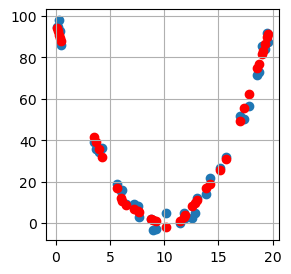

In [23]:
import matplotlib.pyplot as plt
plt.figure(figsize=(3,3))
plt.scatter(xTest,yTest)
plt.scatter(xTest,y_pred_reshaped,c='r')
plt.grid(True)
plt.show()